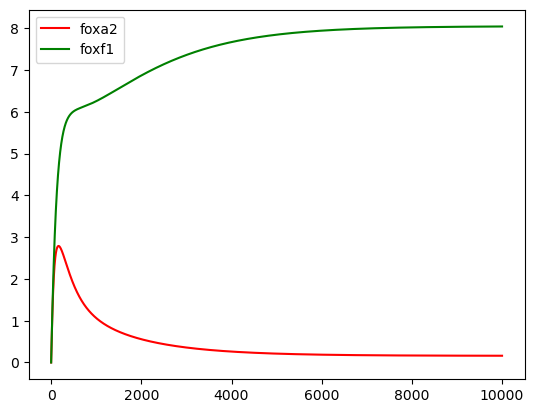

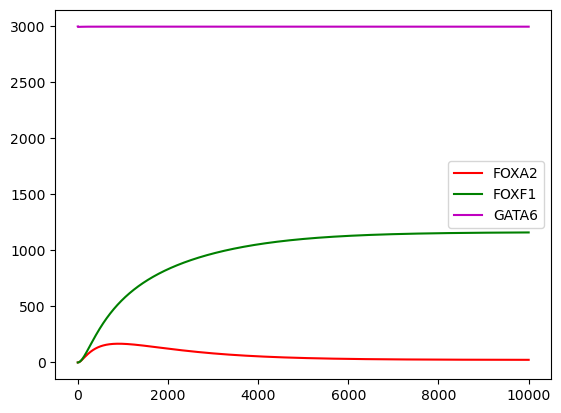

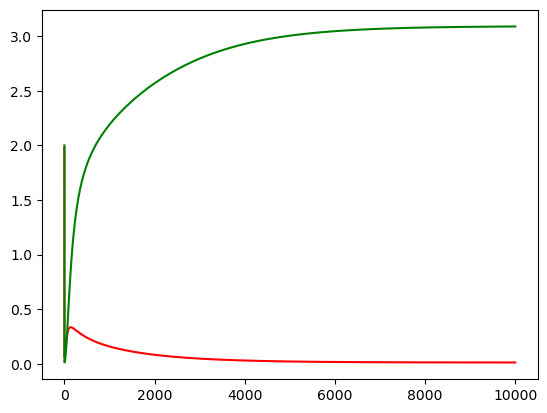

In [52]:
import GATA6_response_model


a, b, c = GATA6_response_model.RunDeterministicResponse(GATA6=3000, T=10000, dt=1., plots=True, plotPromoter=True,
                                                                inhibited_transcription_rate=[5e-8, 5e-8],
                                                                activated_transcription_rate = [0.025, 0.015, 0.025, 0.025],
                                                                double_activated_transcription_rate = [0.05, 0.025],
                                                                P_act_binding = [5e-8, 5e-8, 1, 5],
                                                                P_inh_binding=[50.0, 1.0],
                                                                P1_act_unbinding=[100.0, 100.0, 100.0, 100.0],
                                                                P1_inh_unbinding=[25.0, 1.0],
                                                                P1_act_binding=[1, 0.5, 1, 0.75],
                                                                P2_act_unbinding=[50.0, 200.0, 100.0, 100.0])

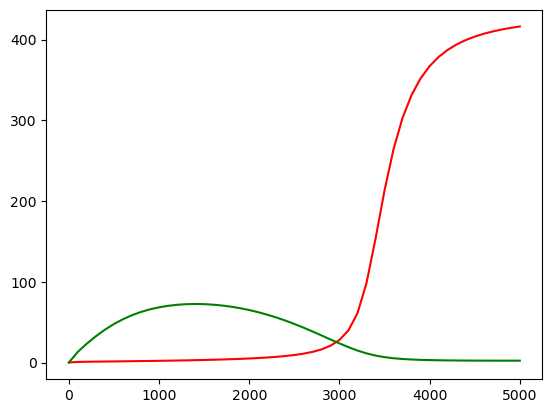

In [25]:
import GATA6_response_model
from matplotlib import pyplot as plt
import numpy as np


gata6_max = 5000
gata6 = np.linspace(0, gata6_max, 51)
foxa2s = np.zeros(len(gata6))
foxf1s = np.zeros(len(gata6))
for val in range(len(gata6)):
    a, b, c = GATA6_response_model.RunDeterministicResponse(GATA6=gata6[val]+1, T=10000, dt=1., plots=False, plotPromoter=False,
                                                                inhibited_transcription_rate=[5e-8, 5e-8],
                                                                activated_transcription_rate = [0.01, 0.01],
                                                                double_activated_transcription_rate = [0.05, 0.025],
                                                                triple_activated_transcription_rate = [0.1, 0.05],
                                                                P_act_binding = [1, 1],
                                                                P_inh_binding=[100.0, 3.0],
                                                                P1_act_unbinding=[100.0, 100.0],
                                                                P1_inh_unbinding=[20.0, 1.0],
                                                                P1_act_binding=[1.0, 1.0],
                                                                P2_act_unbinding=[100.0, 100.0],
                                                                P2_act_binding=[1.0, 1.0],
                                                                P3_act_unbinding=[100.0, 100.0])
    foxa2s[val] = c[-1,2]
    foxf1s[val] = c[-1,3]

plt.figure()
plt.plot(gata6, foxa2s, color='r')
plt.plot(gata6, foxf1s, color='g')
# Build s, taking slider values are parameters.



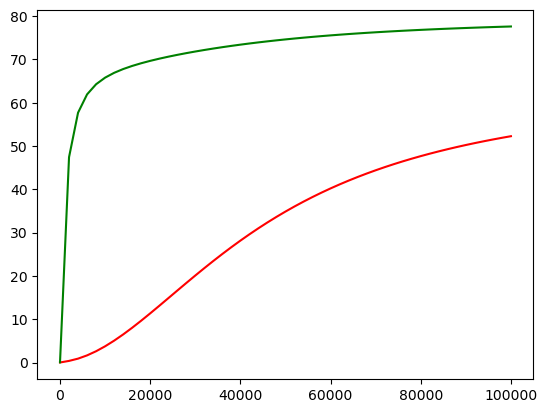

In [53]:
import GATA6_response_model_v2
from matplotlib import pyplot as plt
import numpy as np


gata6_max = 100000
gata6 = np.linspace(0, gata6_max, 51)
foxa2s = np.zeros(len(gata6))
foxf1s = np.zeros(len(gata6))
for val in range(len(gata6)):
    a, b, c = GATA6_response_model_v2.RunDeterministicResponse(GATA6=gata6[val]+1, T=10000, dt=1., plots=False, plotPromoter=False,
                                                                inhibited_transcription_rate=[5e-8, 5e-8],
                                                                activated_transcription_rate = [0.01, 0.01],
                                                                double_activated_transcription_rate= [0.01, 0.015],
                                                                triple_activated_transcription_rate = [0.05, 0.025],
                                                                quad_activated_transcription_rate = [0.1, 0.05],
                                                                P_act_binding = [.035, 0.15],
                                                                P_inh_binding=[100.0, 3.0],
                                                                P1_act_unbinding=[100.0, 100.0],
                                                                P1_inh_unbinding=[25.0, 1.0],
                                                                P1_act_binding=[0.05, 0.05],
                                                                P2_act_unbinding=[100.0, 100.0],
                                                                P2_act_binding=[.10, 0.10],
                                                                P3_act_unbinding=[100.0, 100.0],
                                                                P3_act_binding=[1.0, 1.0],
                                                                P4_act_unbinding=[100.0, 100.0])
    foxa2s[val] = c[-1,2]
    foxf1s[val] = c[-1,3]

plt.figure()
plt.plot(gata6, foxa2s, color='r')
plt.plot(gata6, foxf1s, color='g')
# Build s, taking slider values are parameters.



In [49]:
import GATA6_response_model
import numpy as np
SRs = []
for i in range(20):
    sa, sb, sc = GATA6_response_model.RunStochasticResponse(GATA6=3000, T=10000, dt=1., plots=False, plotPromoter=False,                                                                
                                                            inhibited_transcription_rate=[5e-8, 5e-8],
                                                                activated_transcription_rate = [0.025, 0.015, 0.025, 0.025],
                                                                double_activated_transcription_rate = [0.05, 0.025],
                                                                P_act_binding = [5e-8, 5e-8, 1, 5],
                                                                P_inh_binding=[50.0, 1.0],
                                                                P1_act_unbinding=[100.0, 100.0, 100.0, 100.0],
                                                                P1_inh_unbinding=[25.0, 1.0],
                                                                P1_act_binding=[1, 0.5, 1, 0.75],
                                                                P2_act_unbinding=[50.0, 200.0, 100.0, 100.0])
    SRs.append(sc)
SR_array = np.array(SRs)


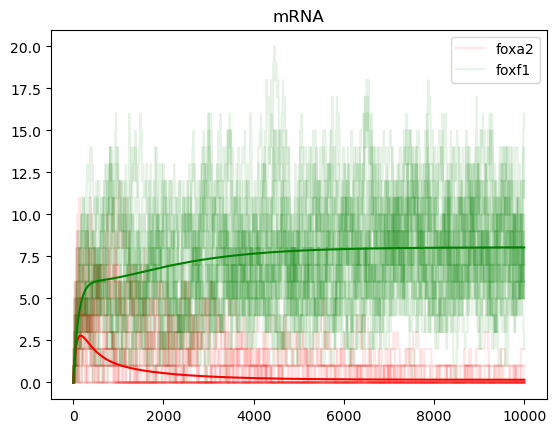

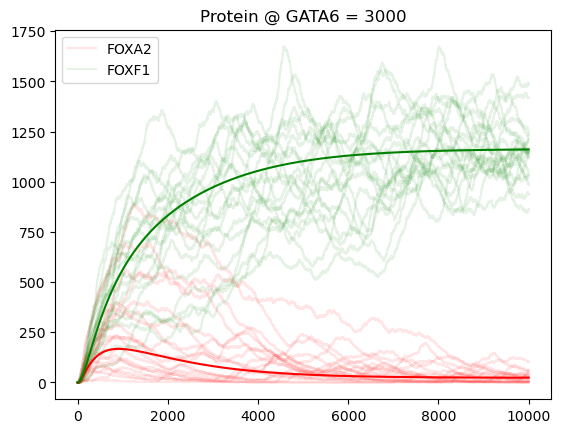

In [53]:
import pylab
pylab.cla()
sts = np.arange(0, 10001, 1)
curvetypes = ['r-', 'g-', 'b-', 'k-', 'm-', 'c-']
pylab.figure(1)
for i in range(SR_array.shape[0]):
    for j in range(0, 2):
        pylab.plot(sts, SR_array[i, :, j], curvetypes[j], alpha=0.1)
        pylab.legend(['foxa2', 'foxf1'])
        pylab.title(f'mRNA @ GATA6 = {3000}')
for j in range(0, 2):
    pylab.plot(sts, c[:, j], curvetypes[j], alpha=1)
    pylab.legend(['foxa2', 'foxf1'])
    pylab.title('mRNA')
pylab.figure(2)
for i in range(SR_array.shape[0]):
    curvetypes = ['r-', 'g-', 'm-', 'b-', 'k-', 'c-']
    for j in range(2, 4):
        pylab.plot(sts, SR_array[i, :, j],curvetypes[j-2], alpha=0.1)
        pylab.legend(['FOXA2', 'FOXF1'])
        pylab.title(f'Protein @ GATA6 = {3000}')
for j in range(2, 4):
    pylab.plot(sts, c[:, j], curvetypes[j-2], alpha=1)
pylab.show()

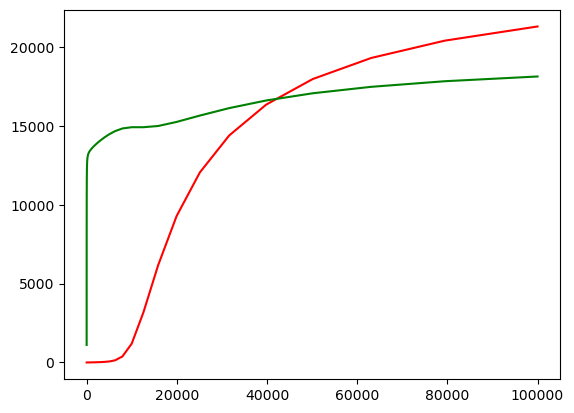

In [43]:
import GATA6_response_model
from matplotlib import pyplot as plt
import numpy as np


gata6_max = 50000
gata6 = np.logspace(0, 5, 51, base=10)
foxa2s = np.zeros(len(gata6))
foxf1s = np.zeros(len(gata6))
for val in range(len(gata6)):
    a, b, c = GATA6_response_model.RunDeterministicResponse(GATA6=gata6[val], T=10000, dt=1., plots=False, plotPromoter=False,
                                                            inhibited_transcription_rate=[5e-8, 5e-8],
                                                            activated_transcription_rate = [0.3, 0.15, 0.3, 0.15],
                                                            double_activated_transcription_rate = [0.5, 0.4],
                                                            P_act_binding = [0, 0, 1, 10],
                                                            P_inh_binding=[20.0, 1.0],
                                                            P1_act_unbinding=[100.0, 100.0, 100.0, 100.0],
                                                            P1_inh_unbinding=[10.0, 20.0],
                                                            P1_act_binding=[1, 0.01, 1, 0.1],
                                                            P2_act_unbinding=[10.0, 100.0, 100.0, 100.0])
    foxa2s[val] = c[-1,2]
    foxf1s[val] = c[-1,3]

plt.figure()
plt.plot(gata6, foxa2s, color='r')
plt.plot(gata6, foxf1s, color='g')
# plt.xscale('log')
# plt.yscale('log')
# Build s, taking slider values are parameters.



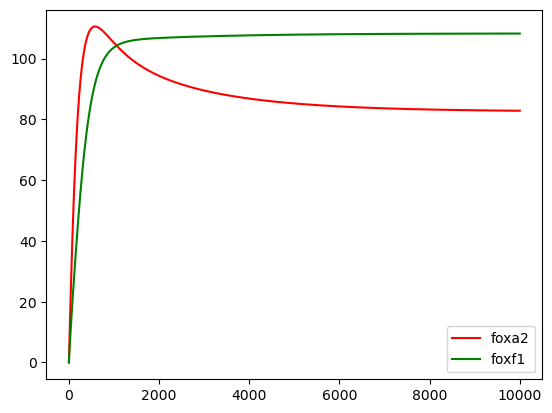

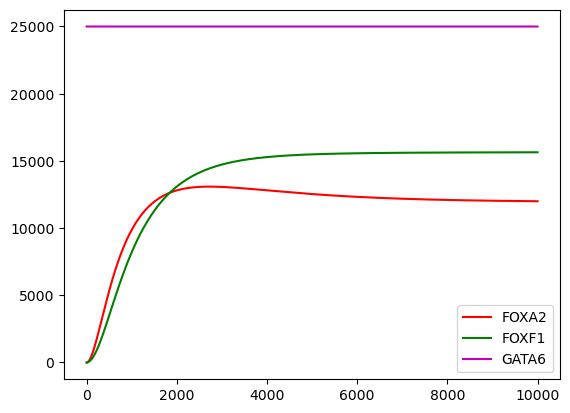

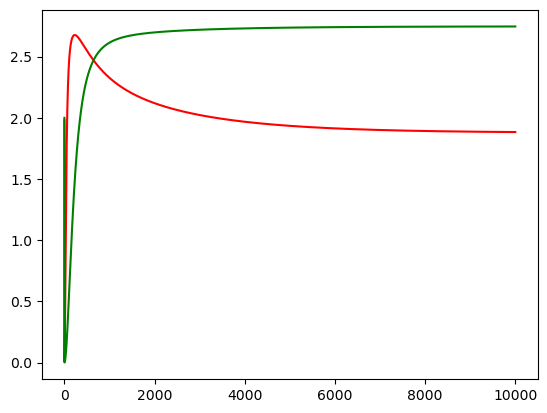

In [27]:
import GATA6_response_model


a, b, c = GATA6_response_model.RunDeterministicResponse(GATA6=25000, T=10000, dt=1., plots=True, plotPromoter=True,
                                                            inhibited_transcription_rate=[5e-8, 5e-8],
                                                            activated_transcription_rate = [0.3, 0.15, 0.3, 0.15],
                                                            double_activated_transcription_rate = [0.5, 0.4],
                                                            P_act_binding = [0, 0, 1, 10],
                                                            P_inh_binding=[20.0, 1.0],
                                                            P1_act_unbinding=[100.0, 100.0, 100.0, 100.0],
                                                            P1_inh_unbinding=[10.0, 20.0],
                                                            P1_act_binding=[1, 0.01, 1, 0.1],
                                                            P2_act_unbinding=[10.0, 100.0, 100.0, 100.0])


In [38]:
import GATA6_response_model
import numpy as np
SRs = []
for i in range(20):
    sa, sb, sc = GATA6_response_model.RunStochasticResponse(GATA6=25000, T=10000, dt=1., plots=False, plotPromoter=False,
                                                            inhibited_transcription_rate=[5e-8, 5e-8],
                                                            activated_transcription_rate = [0.3, 0.15, 0.3, 0.15],
                                                            double_activated_transcription_rate = [0.5, 0.4],
                                                            P_act_binding = [0, 0, 1, 10],
                                                            P_inh_binding=[20.0, 1.0],
                                                            P1_act_unbinding=[100.0, 100.0, 100.0, 100.0],
                                                            P1_inh_unbinding=[10.0, 20.0],
                                                            P1_act_binding=[1, 0.01, 1, 0.1],
                                                            P2_act_unbinding=[10.0, 100.0, 100.0, 100.0])
    SRs.append(sc)
SR_array = np.array(SRs)


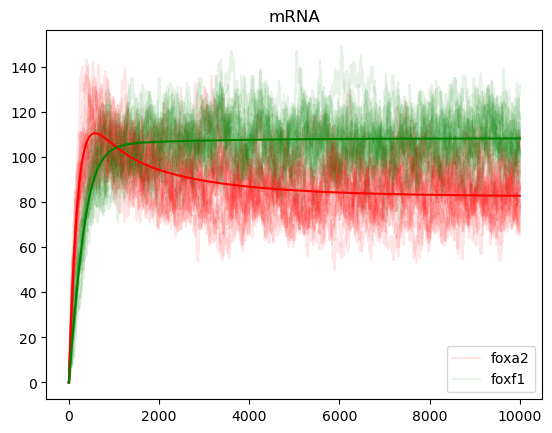

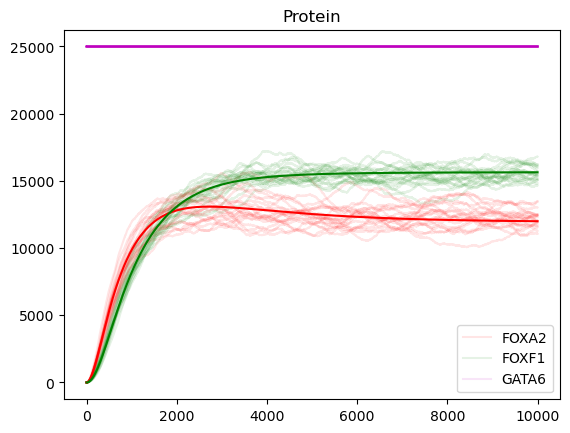

In [39]:
import pylab
pylab.cla()
sts = np.arange(0, 10001, 1)
curvetypes = ['r-', 'g-', 'b-', 'k-', 'm-', 'c-']
pylab.figure(1)
for i in range(SR_array.shape[0]):
    for j in range(0, 2):
        pylab.plot(sts, SR_array[i, :, j], curvetypes[j], alpha=0.1)
        pylab.legend(['foxa2', 'foxf1'])
        pylab.title('mRNA')
for j in range(0, 2):
    pylab.plot(sts, c[:, j], curvetypes[j], alpha=1)
    pylab.legend(['foxa2', 'foxf1'])
    pylab.title('mRNA')
pylab.figure(2)
for i in range(SR_array.shape[0]):
    curvetypes = ['r-', 'g-', 'm-', 'b-', 'k-', 'c-']
    for j in range(2, 5):
        pylab.plot(sts, SR_array[i, :, j],curvetypes[j-2], alpha=0.1)
        pylab.legend(['FOXA2', 'FOXF1', 'GATA6'])
        pylab.title('Protein')
for j in range(2, 5):
    pylab.plot(sts, c[:, j], curvetypes[j-2], alpha=1)
pylab.show()

In [37]:
print(SR_array[:,-1,:])

[[8.28123678e+01 1.08215894e+02 1.19966940e+04 1.56393288e+04
  2.49975545e+04 3.32560026e-05 2.02134469e-04 3.79100904e-04
  3.92388516e-01 7.93409959e-03 1.12898219e-01 1.04020299e+00
  1.21247282e-01 9.51450558e-01 1.37326385e+00]
 [8.28123678e+01 1.08215894e+02 1.19966940e+04 1.56393288e+04
  2.49975545e+04 3.32560026e-05 2.02134469e-04 3.79100904e-04
  3.92388516e-01 7.93409959e-03 1.12898219e-01 1.04020299e+00
  1.21247282e-01 9.51450558e-01 1.37326385e+00]
 [8.28123678e+01 1.08215894e+02 1.19966940e+04 1.56393288e+04
  2.49975545e+04 3.32560026e-05 2.02134469e-04 3.79100904e-04
  3.92388516e-01 7.93409959e-03 1.12898219e-01 1.04020299e+00
  1.21247282e-01 9.51450558e-01 1.37326385e+00]
 [8.28123678e+01 1.08215894e+02 1.19966940e+04 1.56393288e+04
  2.49975545e+04 3.32560026e-05 2.02134469e-04 3.79100904e-04
  3.92388516e-01 7.93409959e-03 1.12898219e-01 1.04020299e+00
  1.21247282e-01 9.51450558e-01 1.37326385e+00]
 [8.28123678e+01 1.08215894e+02 1.19966940e+04 1.56393288e+04
  

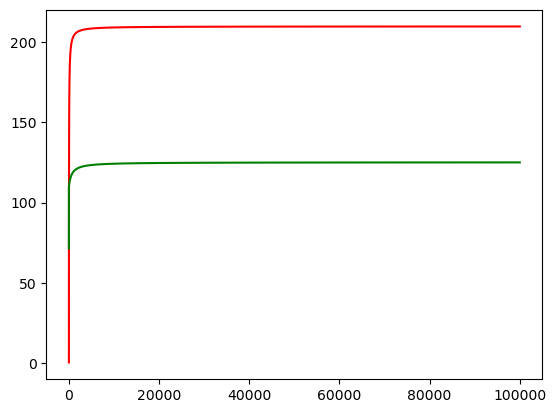

In [1]:
import GATA6_response_model
from matplotlib import pyplot as plt
import numpy as np


gata6_max = 50000
gata6 = np.logspace(0, 5, 51, base=10)
foxa2s = np.zeros(len(gata6))
foxf1s = np.zeros(len(gata6))
for val in range(len(gata6)):
    a, b, c = GATA6_response_model.RunDeterministicResponse(GATA6=gata6[val], T=10000, dt=1., plots=False, plotPromoter=False,
                                                                inhibited_transcription_rate=[5e-8, 5e-8],
                                                                activated_transcription_rate = [0.025, 0.015, 0.025, 0.025],
                                                                double_activated_transcription_rate = [0.05, 0.025],
                                                                P_act_binding = [5e-8, 5e-8, 1, 5],
                                                                P_inh_binding=[0.05, 0.001],
                                                                P1_act_unbinding=[0.1, 0.1, 0.1, 0.1],
                                                                P1_inh_unbinding=[0.025, 0.1],
                                                                P1_act_binding=[0.001, 0.0005, 0.001, 0.00075],
                                                                P2_act_unbinding=[0.05, 0.2, 0.1, 0.1])
    foxa2s[val] = c[-1,2]
    foxf1s[val] = c[-1,3]

plt.figure()
plt.plot(gata6, foxa2s, color='r') 
plt.plot(gata6, foxf1s, color='g')
# Build s, taking slider values are parameters.

